<a href="https://colab.research.google.com/github/VenGr0/Word_Processing/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/russian_literature.zip

--2024-05-29 14:05:46--  https://storage.yandexcloud.net/academy.ai/russian_literature.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21547079 (21M) [application/x-zip-compressed]
Saving to: ‘russian_literature.zip’

russian_literature. 100%[===================>]  20.55M  9.47MB/s    in 2.2s    

2024-05-29 14:05:49 (9.47 MB/s) - ‘russian_literature.zip’ saved [21547079/21547079]



In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "russian_literature" -d ./dataset

error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long


In [ ]:
!dir ./dataset/prose

Blok  Bryusov  Chekhov	Dostoevsky  Gogol  Gorky  Herzen  Lermontov  Pushkin  Tolstoy  Turgenev


In [ ]:
!dir ./dataset/poems

Blok  Lermontov  Nekrasov  Pushkin


In [ ]:
# Загрузка необходимых библиотек
import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок


# Выбираем их явно, чтобы список был перед глазами, и отложилось в голове, что имена писателей (точнее их порядковый номер) - это метки
CLASS_LIST=["Dostoevsky", "Tolstoy", "Turgenev", "Chekhov", "Lermontov", "Blok", "Pushkin", "Gogol", "Gorky", "Herzen", "Bryusov", "Nekrasov" ]

all_texts = {} # Собираем в словарь весь датасет

for author in CLASS_LIST:
  all_texts[author] = '' # Инициализируем пустой строкой новый ключ словаря
  for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)): # Поиск файлов по шаблону
    with open(f'{path}', 'r', errors='ignore') as f: # игнорируем ошибки (например символы из другой кодировки)
                # Загрузка содержимого файла в строку
                text = f.read()

    all_texts[author]  += ' ' + text.replace('\n', ' ') # Заменяем символ перехода на новую строку пробелом

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in all_texts.values())
print(f'Датасет состоит из {total} символов')

Датасет состоит из 38146925 символов


In [ ]:
print('Общая выборка по писателям:')
for author in CLASS_LIST:
    # удобный метод форматирования 2 знака после запятой f'{ВЫРАЖЕНИЕ:.2f}'
    print(f'{author} - {len(all_texts[author])} символов, доля в общей базе: {len(all_texts[author])/total*100 :.2f}%')

Общая выборка по писателям:
Dostoevsky - 11221679 символов, доля в общей базе: 29.42%
Tolstoy - 9392435 символов, доля в общей базе: 24.62%
Turgenev - 2345243 символов, доля в общей базе: 6.15%
Chekhov - 1834330 символов, доля в общей базе: 4.81%
Lermontov - 364382 символов, доля в общей базе: 0.96%
Blok - 604204 символов, доля в общей базе: 1.58%
Pushkin - 1399557 символов, доля в общей базе: 3.67%
Gogol - 2196599 символов, доля в общей базе: 5.76%
Gorky - 4324025 символов, доля в общей базе: 11.34%
Herzen - 1282316 символов, доля в общей базе: 3.36%
Bryusov - 2830897 символов, доля в общей базе: 7.42%
Nekrasov - 351258 символов, доля в общей базе: 0.92%


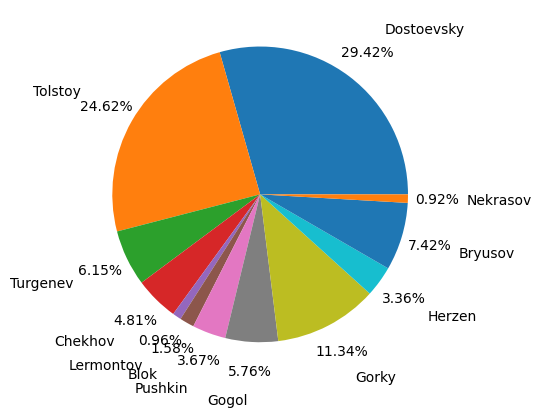

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([len(i) for i in all_texts.values()], # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

In [ ]:
NUM_WORDS = 10000 # Размер словаря

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)


# Построение частотного словаря по текстам
tokenizer.fit_on_texts(all_texts.values())
items = list(tokenizer.word_index.items())

In [ ]:
# Вывод нескольких наиболее часто встречающихся слов
print("Первые 10 часто встречающих слова", items[:10])

# Размер словаря может быть больше, чем num_words, однако при преобразовании в последовательности или матрицы учитываются только первые num_words слов
print("Размер словаря:", len(items))

Первые 10 часто встречающих слова [('неизвестное_слово', 1), ('и', 2), ('в', 3), ('не', 4), ('что', 5), ('я', 6), ('на', 7), ('с', 8), ('он', 9), ('как', 10)]
Размер словаря: 249845


In [ ]:
# Проверка индекса слова в словаре
try:
    print('Вы ввели слово с индексом:', tokenizer.word_index[input('Введите слово (в нижнем регистре): ')])
except:
    print('Такого слова нет в словаре слова нет в словаре')

Введите слово (в нижнем регистре): дуб
Вы ввели слово с индексом: 8394


In [ ]:
seq_train = tokenizer.texts_to_sequences(all_texts.values())

In [ ]:
author = "Pushkin"
cls = CLASS_LIST.index(author)

print("Фрагмент обучающего текста:")
print("В виде оригинального текста:              ", all_texts[author][:120])
print("Он же в виде последовательности индексов: ", seq_train[cls][:20])

Фрагмент обучающего текста:
В виде оригинального текста:                Александр Пушкин ЕГИПЕТСКИЕ НОЧИ ГЛАВА I — Quel est cet homme? — На c'est un bien grand talent, il fait de sa voix tout
Он же в виде последовательности индексов:  [2097, 3330, 1, 623, 997, 571, 1, 2316, 1, 6545, 7, 2655, 1727, 4593, 7610, 1, 1450, 6544, 469, 9784]


In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in seq_train)
print(f'Датасет состоит из {total} слов')

Датасет состоит из 5938471 слов


In [ ]:
print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train[cls])} слов, доля в общей базе: {len(seq_train[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))

Общая выборка по писателям (по словам):
Dostoevsky - 1779919 слов, доля в общей базе: 29.97%
Tolstoy - 1456418 слов, доля в общей базе: 24.53%
Turgenev - 365152 слов, доля в общей базе: 6.15%
Chekhov - 291031 слов, доля в общей базе: 4.90%
Lermontov - 55465 слов, доля в общей базе: 0.93%
Blok - 89445 слов, доля в общей базе: 1.51%
Pushkin - 214000 слов, доля в общей базе: 3.60%
Gogol - 341263 слов, доля в общей базе: 5.75%
Gorky - 671672 слов, доля в общей базе: 11.31%
Herzen - 190526 слов, доля в общей базе: 3.21%
Bryusov - 430108 слов, доля в общей базе: 7.24%
Nekrasov - 53472 слов, доля в общей базе: 0.90%
Среднее значение слов:  494873.0
Медианное значение слов:  316147.0


In [ ]:
median = int(np.median(mean_list)) # Зафиксировали медианное значение
CLASS_LIST_BALANCE = [] # Сбалансированный набор меток
seq_train_balance = []
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    if len(seq_train[cls]) > median * 0.6:
      seq_train_balance.append(seq_train[cls][:median])
      CLASS_LIST_BALANCE.append(author)

In [ ]:
total = sum(len(i) for i in seq_train_balance)

print('Сбалансированная выборка по писателям (по словам):')
mean_list_balance = np.array([])
for author in CLASS_LIST_BALANCE:
    cls = CLASS_LIST_BALANCE.index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list_balance = np.append(mean_list_balance, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list_balance.mean()))
print('Медианное значение слов: ', np.median(mean_list_balance))

Сбалансированная выборка по писателям (по словам):
Dostoevsky - 316147 слов, доля в общей базе: 12.19%
Tolstoy - 316147 слов, доля в общей базе: 12.19%
Turgenev - 316147 слов, доля в общей базе: 12.19%
Chekhov - 291031 слов, доля в общей базе: 11.23%
Pushkin - 214000 слов, доля в общей базе: 8.25%
Gogol - 316147 слов, доля в общей базе: 12.19%
Gorky - 316147 слов, доля в общей базе: 12.19%
Herzen - 190526 слов, доля в общей базе: 7.35%
Bryusov - 316147 слов, доля в общей базе: 12.19%
Среднее значение слов:  288049.0
Медианное значение слов:  316147.0


In [ ]:
WIN_SIZE = 1000   # Ширина окна в токенах
WIN_STEP = 100    # Шаг окна в токенах

In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном
# Последовательность разбивается на части до последнего полного окна
# Параметры:
# sequence - последовательность токенов
# win_size - размер окна
# step - шаг окна
def seq_split(sequence, win_size, step):
    # Делим строку на отрезки с помощью генератора цикла
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

In [ ]:
def seq_vectorize(
    seq_list,   # Последовательность
    test_split, # Доля на тестовую сборку
    class_list, # Список классов
    win_size,   # Ширина скользящего окна
    step        # Шаг скользящего окна
):

    # Списки для результирующих данных
    x_train, y_train, x_test, y_test =  [], [], [], []

    # Пробежимся по всем классам:
    for class_item in class_list:
        # Получим индекс класса
        cls = class_list.index(class_item)

        # Пороговое значение индекса для разбивки на тестовую и обучающую выборки
        gate_split = int(len(seq_list[cls]) * (1-test_split))

        # Разбиваем последовательность токенов класса на отрезки
        vectors_train = seq_split(seq_list[cls][:gate_split], win_size, step) # последовательность до порога попадет в обучающую выборку
        vectors_test = seq_split(seq_list[cls][gate_split:], win_size, step)  # последовательность после порога попадет в тестовую выборку

        # Добавляем отрезки в выборку
        x_train += vectors_train
        x_test += vectors_test

        # Для всех отрезков класса добавляем метки класса в виде one-hot-encoding
        # Каждую метку берем len(vectors) раз, так она одинакова для всех выборок одного класса
        y_train += [utils.to_categorical(cls, len(class_list))] * len(vectors_train)
        y_test += [utils.to_categorical(cls, len(class_list))] * len(vectors_test)

    # Возвращаем результатов как numpy-массивов
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
x_train, y_train, x_test, y_test = seq_vectorize(seq_train_balance, 0.1, CLASS_LIST_BALANCE, WIN_SIZE, WIN_STEP)

In [ ]:
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')

Форма входных данных для обучающей выборки: (23248, 1000)
Форма выходных данных (меток) для обучающей выборки: (23248, 9)


In [ ]:
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')

Форма входных данных для тестовой выборки: (2510, 1000)
Форма выходных данных (меток) для тестовой выборки: (2510, 9)


In [ ]:
# Вывод графиков точности и ошибки
def show_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода предсказанных значений
def show_confusion_matrix(y_true, y_pred, class_labels):
    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
    plt.show()


    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


In [ ]:
# Создание последовательной модели нейросети
model_bow = Sequential()
# Входной полносвязный слой
model_bow.add(Dense(200, input_dim=NUM_WORDS, activation="relu"))
# Слой регуляризации Dropout
model_bow.add(Dropout(0.25))
# Слой пакетной нормализации
model_bow.add(BatchNormalization())
# Выходной полносвязный слой
model_bow.add(Dense(len(CLASS_LIST_BALANCE), activation='softmax'))

# Компиляция модели
model_bow.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Вывод модели
model_bow.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               2000200   
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 2002809 (7.64 MB)
Trainable params: 2002409 (7.64 MB)
Non-trainable params: 400 (1.56 KB)
_________________________________________________________________


In [ ]:
#Создаём сеть с Embedding слоем
model_embedding_reg = Sequential()
model_embedding_reg.add(Embedding(NUM_WORDS, 200, input_length=WIN_SIZE))
model_embedding_reg.add(SpatialDropout1D(0.2))
model_embedding_reg.add(Flatten())
model_embedding_reg.add(BatchNormalization())
model_embedding_reg.add(Dense(200, activation="relu"))
model_embedding_reg.add(Dropout(0.2))
model_embedding_reg.add(BatchNormalization())
model_embedding_reg.add(Dense(len(CLASS_LIST_BALANCE), activation='softmax'))

# Компиляция модели
model_embedding_reg.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Вывод модели
model_embedding_reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 200)         2000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 1000, 200)         0         
 alDropout1D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 200000)            0         
                                                                 
 batch_normalization_4 (Bat  (None, 200000)            800000    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 200)               40000200  
                                                                 
 dropout_3 (Dropout)         (None, 200)              

In [ ]:
# Обучение модели
history = model_embedding_reg.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/20
164/164 [==============================] - 18s 96ms/step - loss: 0.9318 - accuracy: 0.7437 - val_loss: 3.2551 - val_accuracy: 0.0000e+00
Epoch 2/20
164/164 [==============================] - 11s 67ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 2.7053 - val_accuracy: 0.0013
Epoch 3/20
164/164 [==============================] - 9s 54ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.3894 - val_accuracy: 0.0834
Epoch 4/20
164/164 [==============================] - 9s 52ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.2472 - val_accuracy: 0.1695
Epoch 5/20
164/164 [==============================] - 8s 50ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2019 - val_accuracy: 0.2138
Epoch 6/20
164/164 [==============================] - 8s 48ms/step - loss: 9.6482e-04 - accuracy: 1.0000 - val_loss: 2.2246 - val_accuracy: 0.2146
Epoch 7/20
164/164 [==============================] - 8s 47ms/step - loss: 7.5606e-04 - accuracy: 1.0000 - val_loss: 2.2379 - val_ac

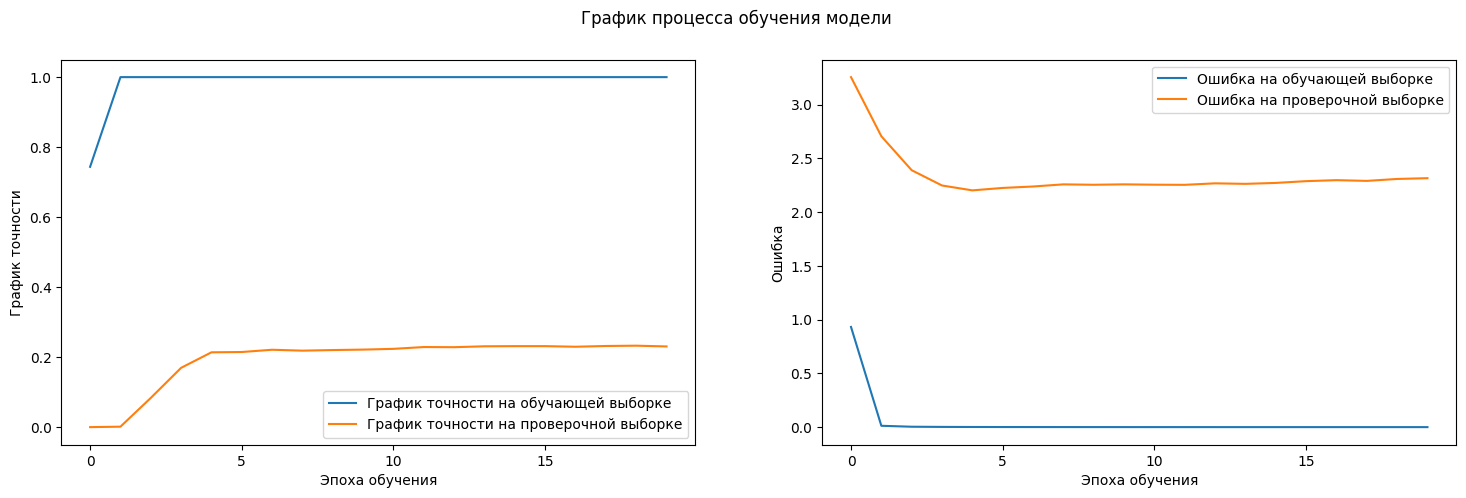

In [ ]:
show_plot(history)

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-06-04 20:24:53--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  15.0MB/s    in 5.3s    

2024-06-04 20:25:00 (9.46 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
!pip install navec

In [ ]:
from navec import Navec

navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [ ]:
# Импорт необходимых библиотек
from navec import Navec
import keras
import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Загрузка модели Navec
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

# Загрузка данных
data_path = keras.utils.get_file("russian_literature.zip", "https://storage.yandexcloud.net/academy.ai/russian_literature.zip")

# Разархивирование датасета
!unzip -qo "{data_path}" -d ./dataset

# Определение списка классов
CLASS_LIST=["Bryusov", "Dostoevsky", "Gogol", "Gorky", "Tolstoy"]

error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long


In [ ]:
# Сбор текстов по авторам
all_texts = {}
for author in CLASS_LIST:
    all_texts[author] = ''
    for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)):
        with open(f'{path}', 'r', errors='ignore') as f:
            text = f.read()
        all_texts[author]  += ' ' + text.replace('\n', ' ')

In [ ]:
# Токенизация текстов
embedding_dim = 300
max_words = 10000

tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(all_texts.values())

# Преобразование текстов в последовательности токенов
seq_train = tokenizer.texts_to_sequences(all_texts.values())
seq_train_balance = [seq_train[cls][:40000] for cls in range(len(CLASS_LIST))]

# Функция для разбиения последовательностей на отрезки с использованием скользящего окна
WIN_SIZE = 1000
WIN_STEP = 100

In [ ]:
def seq_split(sequence, win_size, step):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

def seq_vectorize(seq_list, test_split, class_list, win_size, step):
    x_train, y_train, x_test, y_test =  [], [], [], []

    for class_item in class_list:
        cls = class_list.index(class_item)
        gate_split = int(len(seq_list[cls]) * (1-test_split))

        vectors_train = seq_split(seq_list[cls][:gate_split], win_size, step)
        vectors_test = seq_split(seq_list[cls][gate_split:], win_size, step)

        x_train += vectors_train
        x_test += vectors_test

        y_train += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_train)
        y_test += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_test)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = seq_vectorize(
    seq_train_balance,
    test_split=0.1,
    class_list=CLASS_LIST,
    win_size=WIN_SIZE,
    step=WIN_STEP
)

In [ ]:
# Функция для отображения матрицы ошибок
def show_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), normalize='true')
    cm = np.around(cm, 3)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
# Создание матрицы эмбеддингов
word_index = tokenizer.word_index
embeddings_index = navec

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
# Создание модели
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE))
model.add(BatchNormalization())
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(len(CLASS_LIST), activation='softmax'))

In [ ]:
# Установка весов слоя Embedding и заморозка
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Разделение данных на обучающее и валидационное множества
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Определение коллбэка для сохранения лучшей модели
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.8738 - accuracy: 0.3319
Epoch 1: val_accuracy improved from -inf to 0.36182, saving model to best_model.h5
11/11 [==============================] - 2s 69ms/step - loss: 1.8738 - accuracy: 0.3319 - val_loss: 1.6657 - val_accuracy: 0.3618
Epoch 2/50
 4/11 [=========>....................] - ETA: 0s - loss: 0.5479 - accuracy: 0.8008

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 9/11 [=======================>......] - ETA: 0s - loss: 0.4025 - accuracy: 0.8524
Epoch 2: val_accuracy improved from 0.36182 to 0.36467, saving model to best_model.h5
11/11 [==============================] - 0s 35ms/step - loss: 0.3737 - accuracy: 0.8632 - val_loss: 1.6793 - val_accuracy: 0.3647
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9758
Epoch 3: val_accuracy improved from 0.36467 to 0.40456, saving model to best_model.h5
11/11 [==============================] - 0s 39ms/step - loss: 0.0946 - accuracy: 0.9758 - val_loss: 1.6715 - val_accuracy: 0.4046
Epoch 4/50
10/11 [==========================>...] - ETA: 0s - loss: 0.0402 - accuracy: 0.9914
Epoch 4: val_accuracy did not improve from 0.40456
11/11 [==============================] - 0s 33ms/step - loss: 0.0393 - accuracy: 0.9922 - val_loss: 1.8272 - val_accuracy: 0.3789
Epoch 5/50
11/11 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9972
Epoch 5: val_accuracy 

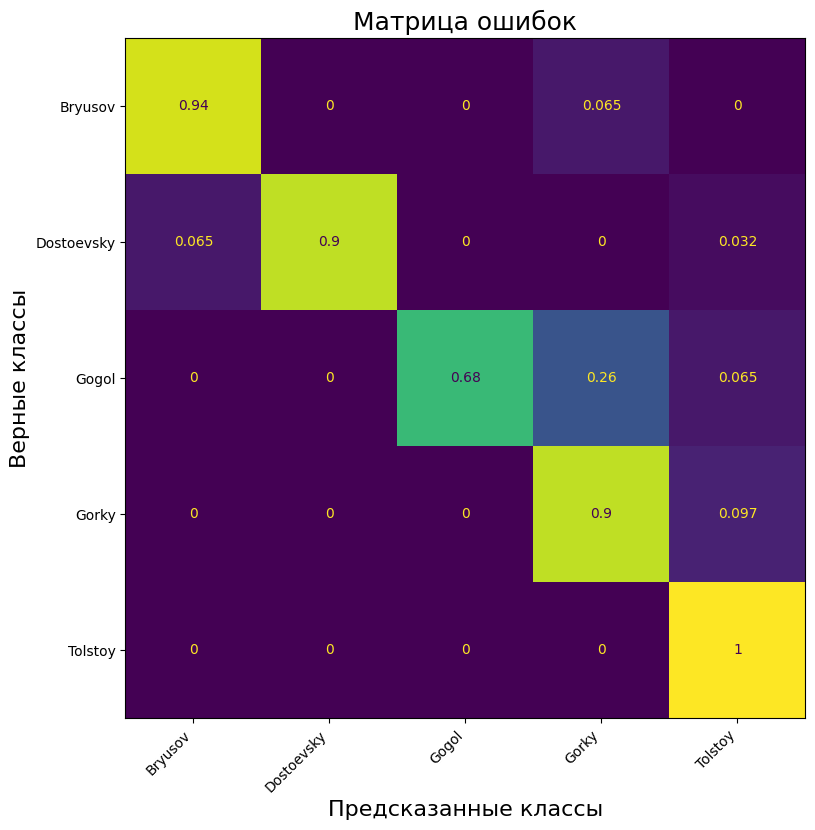


Средняя точность распознавания:  88%


In [ ]:
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием коллбэка
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint])

# Сохранение весов модели
model.save_weights('pre_trained_model.h5')

# Загрузка лучшей модели
model.load_weights('best_model.h5')

# Оценка модели на тестовых данных
y_test_pred = model.predict(x_test)
show_confusion_matrix(y_test, y_test_pred, CLASS_LIST)